In [6]:
import numpy  as np
import matplotlib.pyplot as plt
from Test_Car_2D import Test_Car_2D

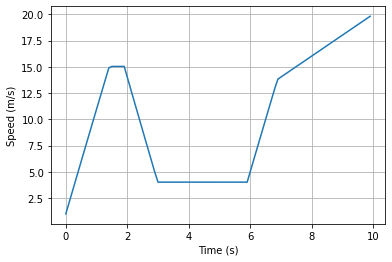

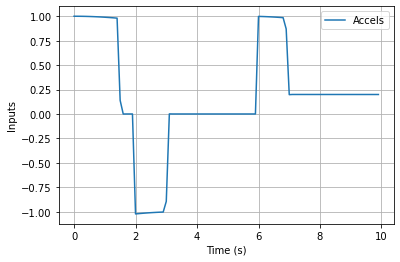

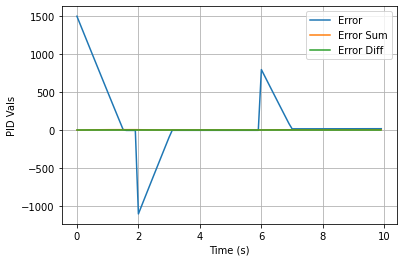

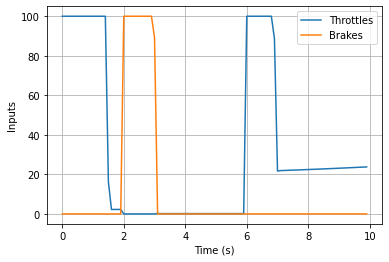

In [7]:
"""Test the car by applying some inputs"""
car = Test_Car_2D()

car.speed_pid.k_p = 100.0
car.speed_pid.k_i = 0.05
car.speed_pid.k_d = 0.0
car.speed_pid.max_error_sum = 100000.0
car.speed_pid.error_sum = 0.0
car.speed_pid.error_last = 0.0
car.speed_pid.error_init = False

u_steer = 0.0
dt = 0.1
speeds = []
times = []
throttles = []
brakes = []
accels = []
errors = []
error_sums = []
error_diffs = []
s_d = 15.0
for i in range(100):
    
    if i == 20:
        s_d = 4.0
    elif i >= 60:
        s_d = float(i)/5.0
    
    u_accel = car.pid_speed_control(s_d)
    errors.append(car.speed_pid.error)
    error_sums.append(car.speed_pid.error_sum)
    error_diffs.append(car.speed_pid.error_diff)
    
    [u_throttle, u_brake] = car.get_controls_from_accel(u_accel)
    throttles.append(u_throttle)
    brakes.append(u_brake)
    u_accel = car.linear_speed_dynamics([u_throttle, u_brake])
    accels.append(u_accel)
    car.kinematic_update([u_steer, u_accel], dt)
    speeds.append(car.speed)
    times.append(i*dt)

plt.plot(times, speeds)
plt.grid()
plt.xlabel("Time (s)")
plt.ylabel("Speed (m/s)")
plt.show()

plt.plot(times, accels, label='Accels')
plt.grid()
plt.xlabel("Time (s)")
plt.ylabel("Inputs")
plt.legend()
plt.show()

plt.plot(times, car.speed_pid.k_p * np.array(errors), label='Error')
plt.plot(times, car.speed_pid.k_i * np.array(error_sums), label='Error Sum')
plt.plot(times, car.speed_pid.k_d * np.array(error_diffs), label='Error Diff')
plt.grid()
plt.xlabel("Time (s)")
plt.ylabel("PID Vals")
plt.legend()
plt.show()

plt.plot(times, throttles, label='Throttles')
plt.plot(times, brakes, label='Brakes')
plt.grid()
plt.xlabel("Time (s)")
plt.ylabel("Inputs")
plt.legend()
plt.show()

